In [1]:
import bokeh
import matplotlib as plt
import numpy as np
%matplotlib inline
import pandas as pd

from bokeh.models.widgets import Button, Paragraph, RadioButtonGroup, Select, Slider
from bokeh.models import Select
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import curdoc
output_notebook()

Loading BokehJS ...

In [34]:
import numpy as np
import pandas as pd 
import lightgbm as lgb
import json

DENSITIES = {0:"SINGLE FAM", 1: "PLEX", 2: "CONDO", 3: "HRISE CONDO"}
SEGMENTS = {0: 'C', 1: 'B', 2: 'A', 3:'X'}

def prediction(input_dict):
    model = lgb.Booster(model_file='noyear.txt')
    lst = [(input_dict)]
    tester = pd.DataFrame(lst)
#     print(tester)
    tester['Log-Built'] = np.log(tester['Year Built'])
    tester['Log-Fixtures'] = np.log(int(tester['Fixtures']))
    tester['Log-SqFt'] = np.log(int(tester['Square Footage']))
    tester['Neighborhood'] = tester['Neighborhood'].astype(float)
    with open('meanpps.json', 'r') as nbhdpps:
        nbhd_dict = json.load(nbhdpps)
    meanpps = pd.DataFrame(nbhd_dict, index=None)
    meanpps.index=meanpps.index.astype(float)
    nbhds = list(meanpps.index)
    tester=pd.merge(how = 'left', left = tester, right = meanpps,left_on="Neighborhood", right_index=True)
    tester['Log-NbhdPPS'] = np.log(tester['NeighborhoodPPS'])
#     tester['Neighborhood'] = str(tester['Neighborhood'])
    tester['Building-Grade'] = tester['Building-Grade'].map(lambda x: SEGMENTS[x])
    tester['Building-Type-Custom'] = tester['Building-Type-Custom'].map(lambda x: DENSITIES[x])
    X = pd.get_dummies(tester[['Log-Built', 'Neighborhood', 'Log-Fixtures', 
                               'Building-Type-Custom', 'Quarter', 'Building-Grade', 
                               'Log-SqFt', 'Log-NbhdPPS']])
    print(X)
    price_pred = model.predict(X)
    return price_pred

In [35]:
import json
import pps_regressor

def update_data(event):
    bldg_data = {
        'Neighborhood': str(nbhd.value_input),
        'Building-Type-Custom': density.active,
        'Fixtures': fixtures.value,
        'Year Built': int(yearbuilt.value_input),
        'Building-Grade': segment.active,
        'Square Footage': squarefootage.value,
        'Renovation': reno_new.active,
        'Quarter': quarter.active,
        }

    price_pred = prediction(bldg_data)
    floatpred = float(price_pred)
    with open('prediction.json', 'w') as file:
        json.dump(floatpred, file)
    p.text = '$' + str(price_pred[0] * bldg_data['Square Footage'])    
    

In [36]:
from bokeh.layouts import column, widgetbox
from bokeh.models.widgets import Dropdown, Slider, TextInput, CheckboxButtonGroup, Select, RadioButtonGroup, RadioGroup

# Create some widgets
nbhd = TextInput(placeholder="4-digit #", title="Neighborhood Code:")
densities = {"Single-Family":"SINGLE FAM", "Plex": "PLEX", "Mid-Rise": "CONDO", "High-Rise": "HRISE CONDO"}
density = RadioButtonGroup(labels=['Single-Family', 'Plex', 'Mid-Rise', 'High-Rise'])
reno_new = RadioButtonGroup(labels=["Renovation", "New Build"])
#If renovation, select year built of the property:
yearbuilt = TextInput(placeholder="4-digit #", title="Year of the original structure (if renovation):")
squarefootage = Slider(start=500, end=3500, value=500, step=10, title="Square Footage")
segments = {"Affordable": "C", "Mid-Range":"B", "High-End":"A", "Ultra-Lux":"X"}
segment = RadioButtonGroup(
        labels=["Affordable", "Mid-Range", "High-End", "Luxury"])
quarters = [("One", 1), ("Two", 2), ("Three", 3), ("Four", 4)]
quarter = RadioGroup(labels = ['First', 'Second', 'Third', 'Fourth'])
fixtures = Slider(start=3, end=20, value=3, step=1, title="Water Fixtures")
calculate = Button(label="Get Price", button_type="success")
calculate.on_click(update_data)
p = Paragraph(text="foobar")
box = widgetbox([density, nbhd, reno_new, yearbuilt, squarefootage, segment, fixtures, quarter, calculate, p])

In [37]:
def show_box(doc):
    doc.add_root(box)
show(show_box)

ERROR:bokeh.server.protocol_handler:error handling message Message 'EVENT' (revision 1) content: '{"event_name":"button_click","event_values":{"model_id":"1270"}}': KeyError(None)


   Log-Built  Neighborhood  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   7.585789        1026.0      2.484907        1  7.200425     5.587068   

   Building-Type-Custom_SINGLE FAM  Building-Grade_A  
0                                1                 1  
   Log-Built  Neighborhood  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   7.585789        1026.0      2.484907        1  7.200425     5.587068   

   Building-Type-Custom_SINGLE FAM  Building-Grade_C  
0                                1                 1  
   Log-Built  Neighborhood  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   7.585789        1026.0      2.890372        1  7.200425     5.587068   

   Building-Type-Custom_SINGLE FAM  Building-Grade_X  
0                                1                 1  
   Log-Built  Neighborhood  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   7.585789        1126.0      2.890372        1  7.200425     5.424584   

   Building-Type-Custom_SINGLE FAM  Building-Grade_X  
0  

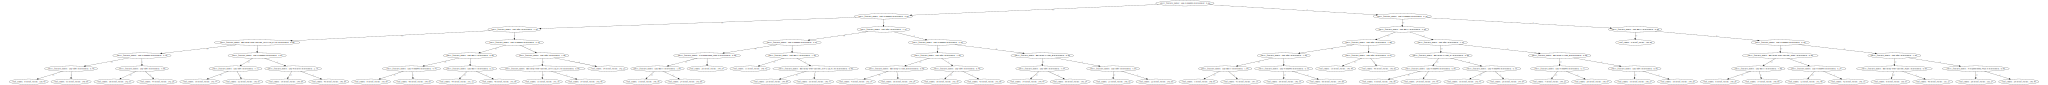

In [20]:
model = lgb.Booster(model_file='noyear.txt')
model.params
lgb.create_tree_digraph(booster=model, precision=2)

In [28]:
model.feature_name()

['Log-Built',
 'Log-NbhdPPS',
 'Log-SqFt',
 'Log-Fixtures',
 'Quarter_1',
 'Quarter_2',
 'Quarter_3',
 'Quarter_4',
 'Building-Grade_A',
 'Building-Grade_B',
 'Building-Grade_C',
 'Building-Grade_D',
 'Building-Grade_E',
 'Building-Grade_X',
 'Building-Type-Custom_CONDO',
 'Building-Type-Custom_HRISE',
 'Building-Type-Custom_PLEX',
 'Building-Type-Custom_SINGLE_FAM',
 'Building-Type-Custom_VACANT',
 'Neighborhood_1026.0',
 'Neighborhood_1027.0',
 'Neighborhood_1028.0',
 'Neighborhood_1029.0',
 'Neighborhood_1030.0',
 'Neighborhood_107.0',
 'Neighborhood_1126.0',
 'Neighborhood_1127.0',
 'Neighborhood_1129.0',
 'Neighborhood_1130.0',
 'Neighborhood_1226.0',
 'Neighborhood_1228.0',
 'Neighborhood_126.0',
 'Neighborhood_1326.0',
 'Neighborhood_1327.0',
 'Neighborhood_1328.0',
 'Neighborhood_1329.0',
 'Neighborhood_1330.0',
 'Neighborhood_1426.0',
 'Neighborhood_1626.0',
 'Neighborhood_1627.0',
 'Neighborhood_1926.0',
 'Neighborhood_2026.0',
 'Neighborhood_2126.0',
 'Neighborhood_2127.0',


   Log-Built  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   7.549609      2.302585        0   7.56008          NaN   

   Neighborhood_0    123457.0\nName: Neighborhood, dtype: float64  \
0                                                  1                

   Building-Type-Custom_SINGLE FAM  Building-Grade_B  
0                                1                 1  
   Log-Built  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   5.247024      2.302585        0   7.56008          NaN   

   Neighborhood_0    123457.0\nName: Neighborhood, dtype: float64  \
0                                                  1                

   Building-Type-Custom_SINGLE FAM  Building-Grade_B  
0                                1                 1  
   Log-Built  Log-Fixtures  Quarter  Log-SqFt  Log-NbhdPPS  \
0   5.247024      2.302585        2   7.56008          NaN   

   Neighborhood_0    123457.0\nName: Neighborhood, dtype: float64  \
0                                                  1      